
El proyecto debe tener: 

*   Limpieza de datos (quitar nans, cambiar el tipo de datos, renombrar/eliminar columnas)
*   Análisis exploratorio (distribución de las variables, matriz de correlaciones)
*   Normalización de escalas
*   Aplicación de al menos dos métodos de machine learning y evaluar desempeño de los modelos

Para el siguiente proyecto se toma una base de datos de Kaggle acerca de ataques al corazón y su predicción

*   exang: angina_inducidad (1 = yes; 0 = no)
*   ca: n_vasos (0-3)
*   cp : dolor_de_pecho
  *   Value 1: angina típica
  *   Value 2: angina atípica
  *   Value 3: dolor no asociado
  *   Value 4: asintomatico
*   trtbps : presión_areterial (in mm Hg)
*   chol : colesterol en  mg/dl fetched via BMI sensor
*   fbs : (glucosa_en_ayuno > 120 mg/dl) (1 = true; 0 = false)
*   rest_ecg : resultados del electrocardiograma en reposo
  *   Value 0: normal
  *   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  *   Value 2: hipertrofia ventricular izquierda o derecha probable o definida según los criterios de Estes
*   thalach : frecuencia cardiaca máxima alcanzada
*   target : 0 = menos posibilidades de infarto, 1 = más posibilidades de infarto

In [102]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# Leemos el dataframe 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [105]:
df.rename(columns={"age":"edad",
                   "sex" : "genero",
                   "cp": "dolor_de_pecho",
                   "trtbps":"presión_areterial",
                   "chol":"colesterol",
                   "fbs":"glucosa_en_ayuno",
                   "thalachh":"frec_cardiaca_max",
                   "exng":"angina_inducida",
                   "caa": "n_vasos",
                   "output":"target"},
          inplace=True)

data = df

In [106]:
# Obtenemos el tamaño de nuestro dataframe
data.shape

(303, 14)

In [107]:
# Observamos que tipo de datos contienen nuestras columnas para poder analizar los datos
data.dtypes

edad                   int64
genero                 int64
dolor_de_pecho         int64
presión_areterial      int64
colesterol             int64
glucosa_en_ayuno       int64
restecg                int64
frec_cardiaca_max      int64
angina_inducida        int64
oldpeak              float64
slp                    int64
n_vasos                int64
thall                  int64
target                 int64
dtype: object

In [108]:
# Distribución de NaNs
data.isna().sum(axis=0)
# Significa que no hay valores no nulos (supuestamente)

edad                 0
genero               0
dolor_de_pecho       0
presión_areterial    0
colesterol           0
glucosa_en_ayuno     0
restecg              0
frec_cardiaca_max    0
angina_inducida      0
oldpeak              0
slp                  0
n_vasos              0
thall                0
target               0
dtype: int64

In [109]:
# Quitamos los NaNs y los cambiamos por "0"
data = data.fillna(0)

# Observamos la distribución de NaNs después de la eliminación
data.isna().sum()

# Observamos nuestro dataframe con NaNs eliminados
data

edad  genero  dolor_de_pecho  presión_areterial  colesterol  \
0      63       1               3                145         233   
1      37       1               2                130         250   
2      41       0               1                130         204   
3      56       1               1                120         236   
4      57       0               0                120         354   
..    ...     ...             ...                ...         ...   
298    57       0               0                140         241   
299    45       1               3                110         264   
300    68       1               0                144         193   
301    57       1               0                130         131   
302    57       0               1                130         236   

     glucosa_en_ayuno  restecg  frec_cardiaca_max  angina_inducida  oldpeak  \
0                   1        0                150                0      2.3   
1                   0        1                187                0      3.5   
2                   0        0                172                0      1.4   
3                   0        1                178                0      0.8   
4                   0        1                163                1      0.6   
..                ...      ...                ...              ...      ...   
298                 0        1                123                1      0.2   
299                 0        1                132                0      1.2   
300                 1        1                141                0      3.4   
301                 0        1                115                1      1.2   
302                 0        0                174                0      0.0   

     slp  n_vasos  thall  target  
0      0        0      1       1  
1      0        0      2       1  
2      2        0      2       1  
3      2        0      2       1  
4      2        0      2       1  
..   ...      ...    ...     ...  
298    1        0      3       0  
299    1        0      3       0  
300    1        2      3       0  
301    1        1      3       0  
302    1        1      2       0  

[303 rows x 14 columns]

In [110]:
# Observamos de nuevo para verficiar que ya no hay NaNs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               303 non-null    int64  
 1   genero             303 non-null    int64  
 2   dolor_de_pecho     303 non-null    int64  
 3   presión_areterial  303 non-null    int64  
 4   colesterol         303 non-null    int64  
 5   glucosa_en_ayuno   303 non-null    int64  
 6   restecg            303 non-null    int64  
 7   frec_cardiaca_max  303 non-null    int64  
 8   angina_inducida    303 non-null    int64  
 9   oldpeak            303 non-null    float64
 10  slp                303 non-null    int64  
 11  n_vasos            303 non-null    int64  
 12  thall              303 non-null    int64  
 13  target             303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [111]:
# Obtenemos los nombres de las columnas
data.columns

Index(['edad', 'genero', 'dolor_de_pecho', 'presión_areterial', 'colesterol',
       'glucosa_en_ayuno', 'restecg', 'frec_cardiaca_max', 'angina_inducida',
       'oldpeak', 'slp', 'n_vasos', 'thall', 'target'],
      dtype='object')

In [112]:
colCat = ['genero','angina_inducida','n_vasos','dolor_de_pecho','glucosa_en_ayuno','restecg','slp','thall']
colCon = ["edad","presión_areterial","colesterol","frec_cardiaca_max","oldpeak"]
colTarget = ["target"]
print("Las columnas con datos categóricos son: ", colCat)
print("Las columnas con datos continuos son: ", colCon)
print("La variable target esta dada por: ", colTarget)

Las columnas con datos categóricos son:  ['genero', 'angina_inducida', 'n_vasos', 'dolor_de_pecho', 'glucosa_en_ayuno', 'restecg', 'slp', 'thall']
Las columnas con datos continuos son:  ['edad', 'presión_areterial', 'colesterol', 'frec_cardiaca_max', 'oldpeak']
La variable target esta dada por:  ['target']


In [113]:
# Observamos la estadistica descriptiva de los datos continuos únicamente 
data[colCon].describe().T

count        mean        std    min    25%    50%    75%  \
edad               303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   
presión_areterial  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0   
colesterol         303.0  246.264026  51.830751  126.0  211.0  240.0  274.5   
frec_cardiaca_max  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0   
oldpeak            303.0    1.039604   1.161075    0.0    0.0    0.8    1.6   

                     max  
edad                77.0  
presión_areterial  200.0  
colesterol         564.0  
frec_cardiaca_max  202.0  
oldpeak              6.2

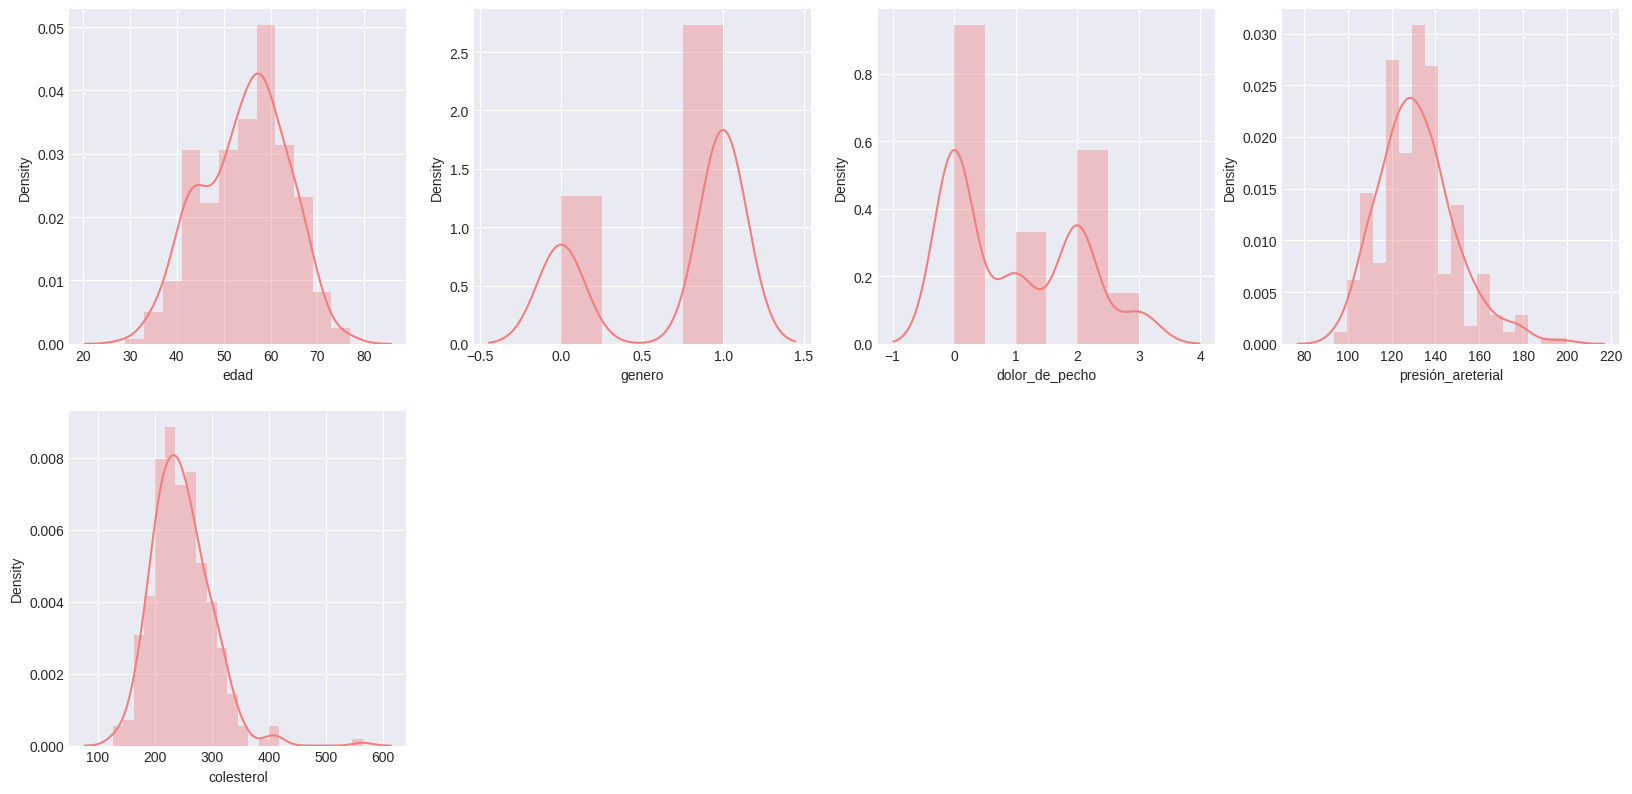

In [114]:
plt.figure(figsize = (20, 20))

for i in range(len(colCon)):
    plt.subplot(4, 4, i+1)
    sns.distplot(data.iloc[:, i], color = 'lightcoral')
    plt.grid()

In [115]:
data_corr = data[colCon].corr().T
data_corr

edad  presión_areterial  colesterol  frec_cardiaca_max  \
edad               1.000000           0.279351    0.213678          -0.398522   
presión_areterial  0.279351           1.000000    0.123174          -0.046698   
colesterol         0.213678           0.123174    1.000000          -0.009940   
frec_cardiaca_max -0.398522          -0.046698   -0.009940           1.000000   
oldpeak            0.210013           0.193216    0.053952          -0.344187   

                    oldpeak  
edad               0.210013  
presión_areterial  0.193216  
colesterol         0.053952  
frec_cardiaca_max -0.344187  
oldpeak            1.000000

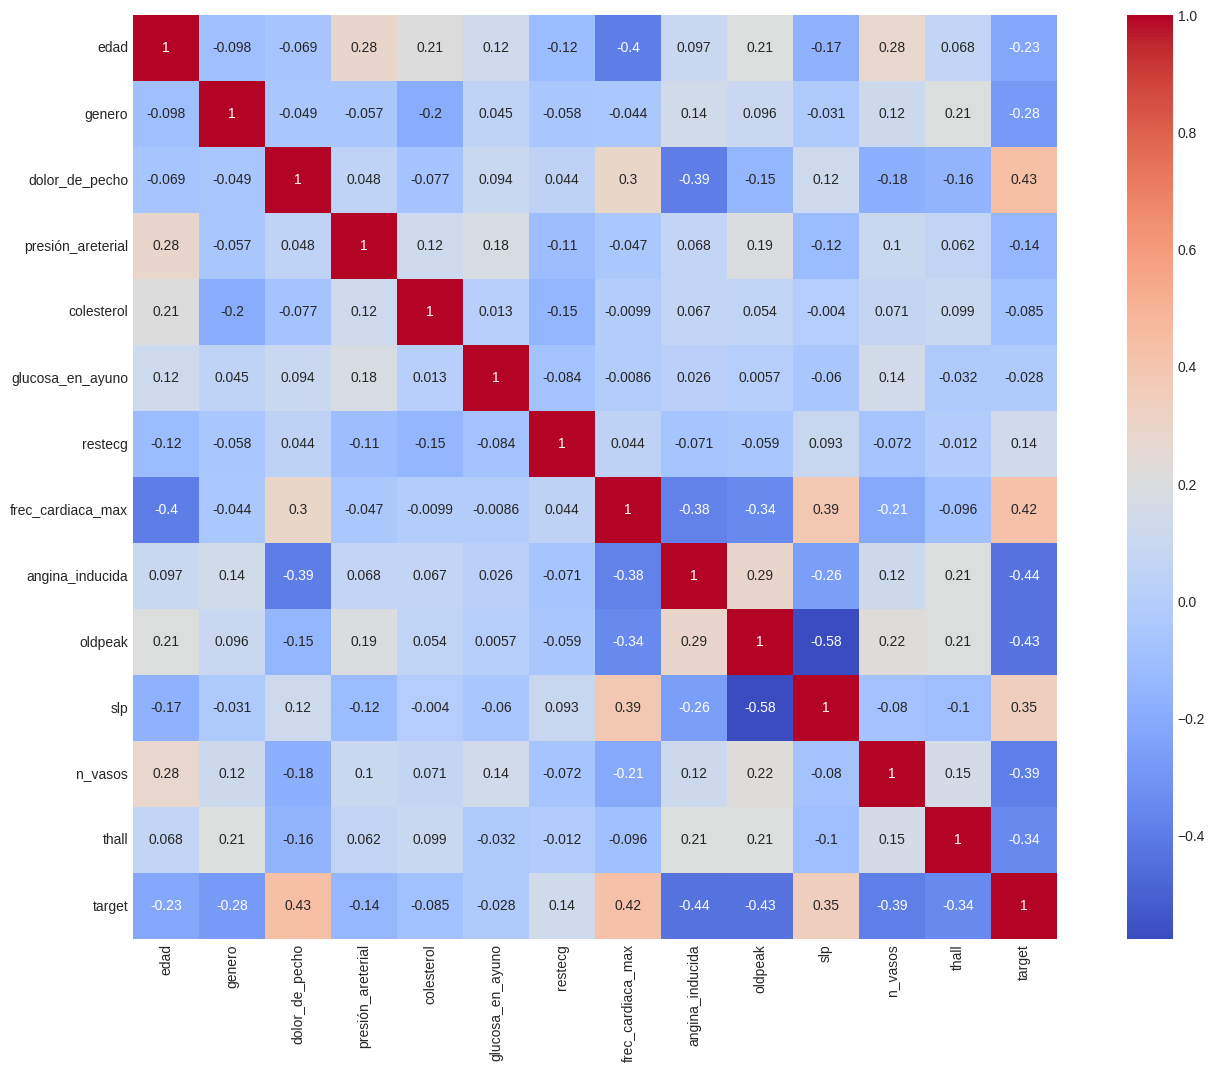

In [116]:
# Tabla de correlacion
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()


**Aplicación de modelos de Machine Learning para predicciones**

In [117]:
# Para la prediccion tenemos
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler


import warnings
warnings.filterwarnings('ignore')

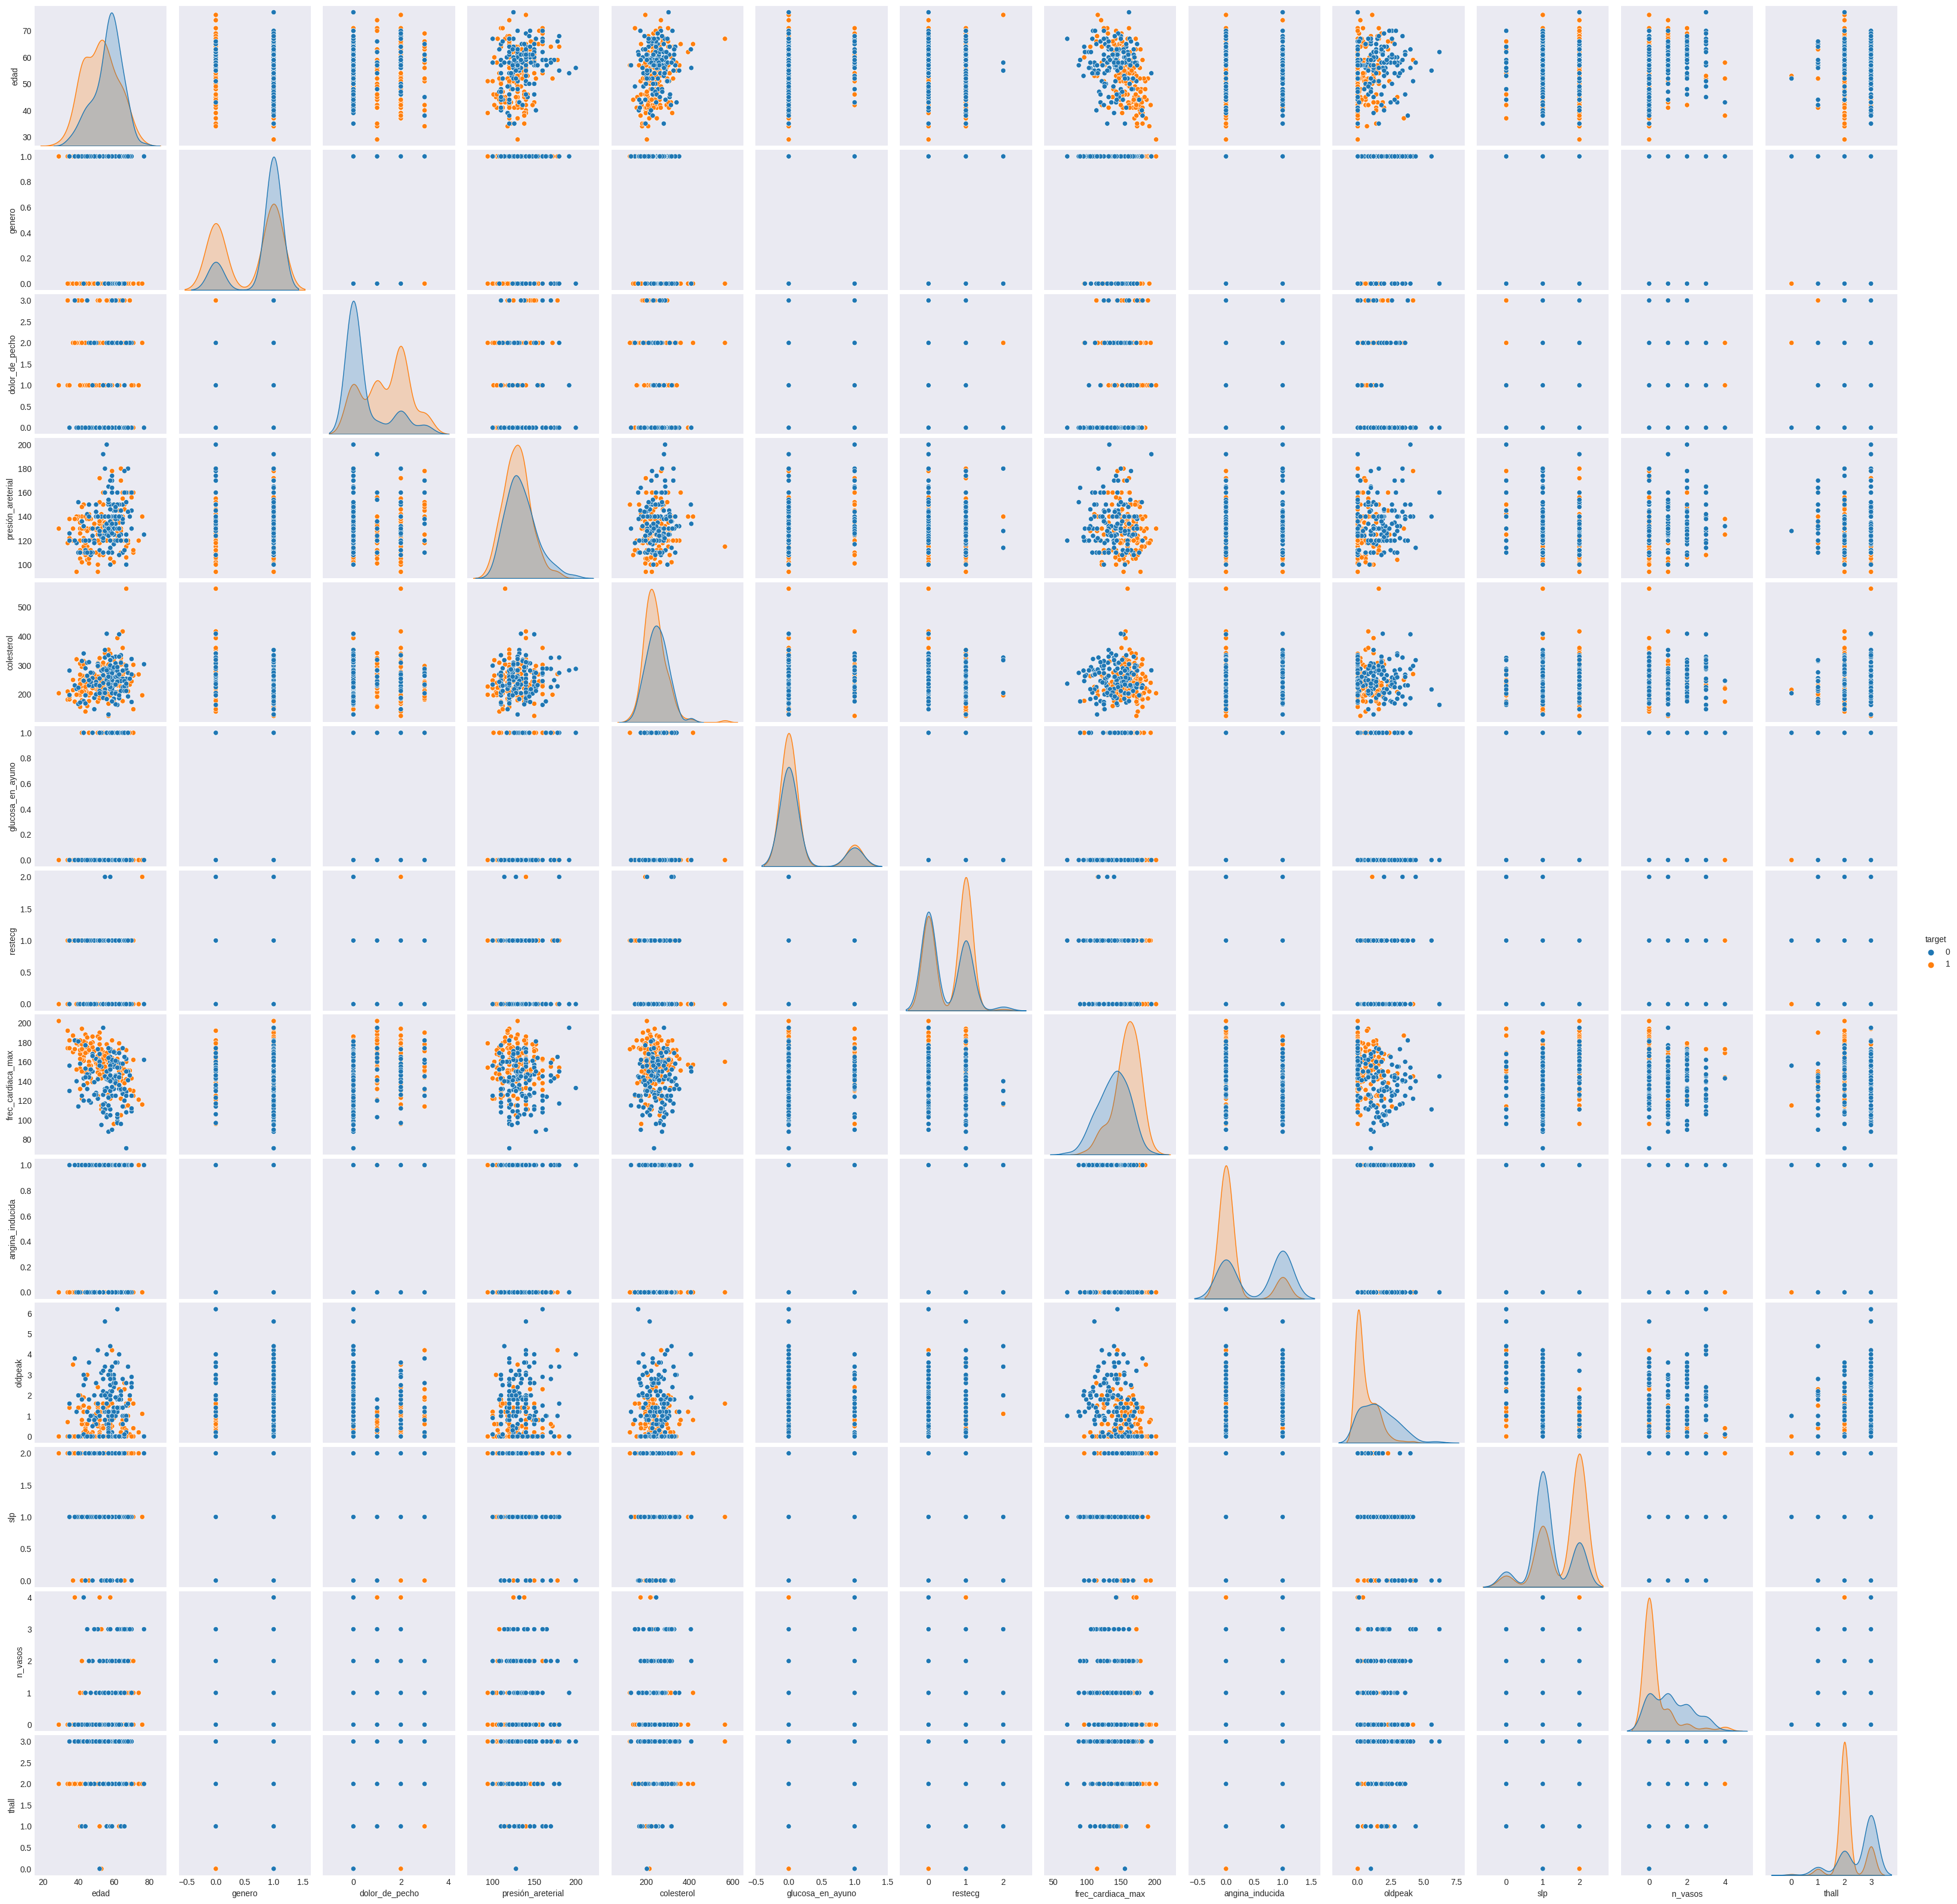

In [118]:
sns.pairplot(data, hue='target')

**Entrenamos y clasificamos los datos**

Para columna de 'genero'

In [119]:
# Creamos una copia del dataframe
data1 = data
# Primero tomamos los datos de la columna de genero para probar los diferentess métodos
le = preprocessing.LabelEncoder()
y = le.fit_transform(data1[['genero']])
X = data1.drop(columns=['genero']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

**Regresión logística**

In [120]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

In [121]:
print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

coef:  [[-0.01055015  0.26412199 -0.00621107 -0.00754686  0.14577756 -0.31619256
   0.015865    0.76942958  0.07762975  0.18012755  0.18807557  0.56082119
  -1.41464105]]
intercept:  [0.29135543]
score:  0.735973597359736


In [122]:
accuracy_score(y_test, y_pred)

0.7362637362637363

In [123]:
def accuracy(TP, TN, FP, FN):
    a = (TP + TN) / (TP + TN + FP + FN)
    return a * 100

def sensibilidad(TP, TN, FP, FN):
    s = TP / (TP + FN)
    return s * 100

def especificidad(TP, TN, FP, FN):
    e = TN / (TN + FP)
    return e * 100

def evaluar_modelo(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    (TN, FP, FN, TP) = matrix.ravel()

    print(f"Exactitud: {accuracy(TP, TN, FP, FN)}")
    print(f"Sensibilidad: {sensibilidad(TP, TN, FP, FN)}")
    print(f"Especificidad: {especificidad(TP, TN, FP, FN)}")

In [124]:
m = confusion_matrix(y_test, y_pred)
m

array([[ 9, 12],
       [12, 58]])

In [125]:
(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

(9, 12, 12, 58)

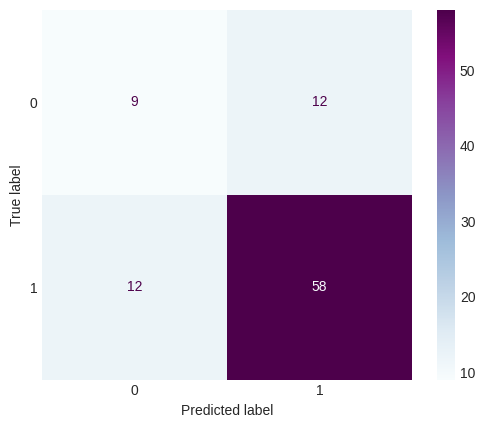

In [126]:
ConfusionMatrixDisplay(m).plot(cmap=plt.cm.BuPu);

In [127]:
evaluar_modelo(y_test, y_pred)

Exactitud: 73.62637362637363
Sensibilidad: 82.85714285714286
Especificidad: 42.857142857142854


**Random Forest**

In [128]:
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Score:  0.6703296703296703


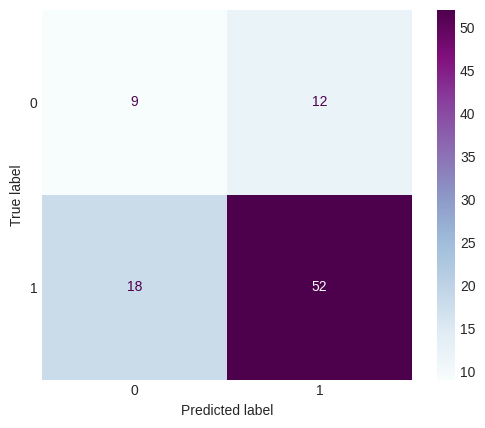

In [129]:
print('Score: ', forest.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.BuPu);

**Decision Tree**

In [130]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)

Score:  0.7252747252747253


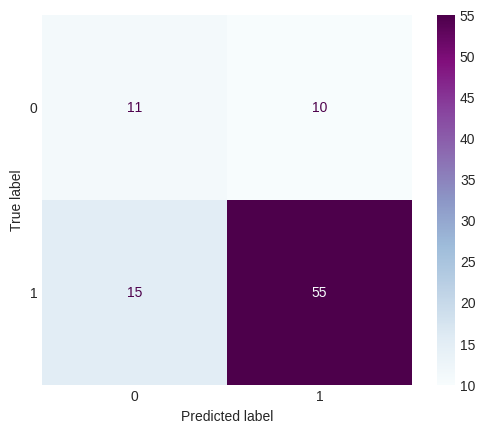

In [131]:
print('Score: ', arbol.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.BuPu);

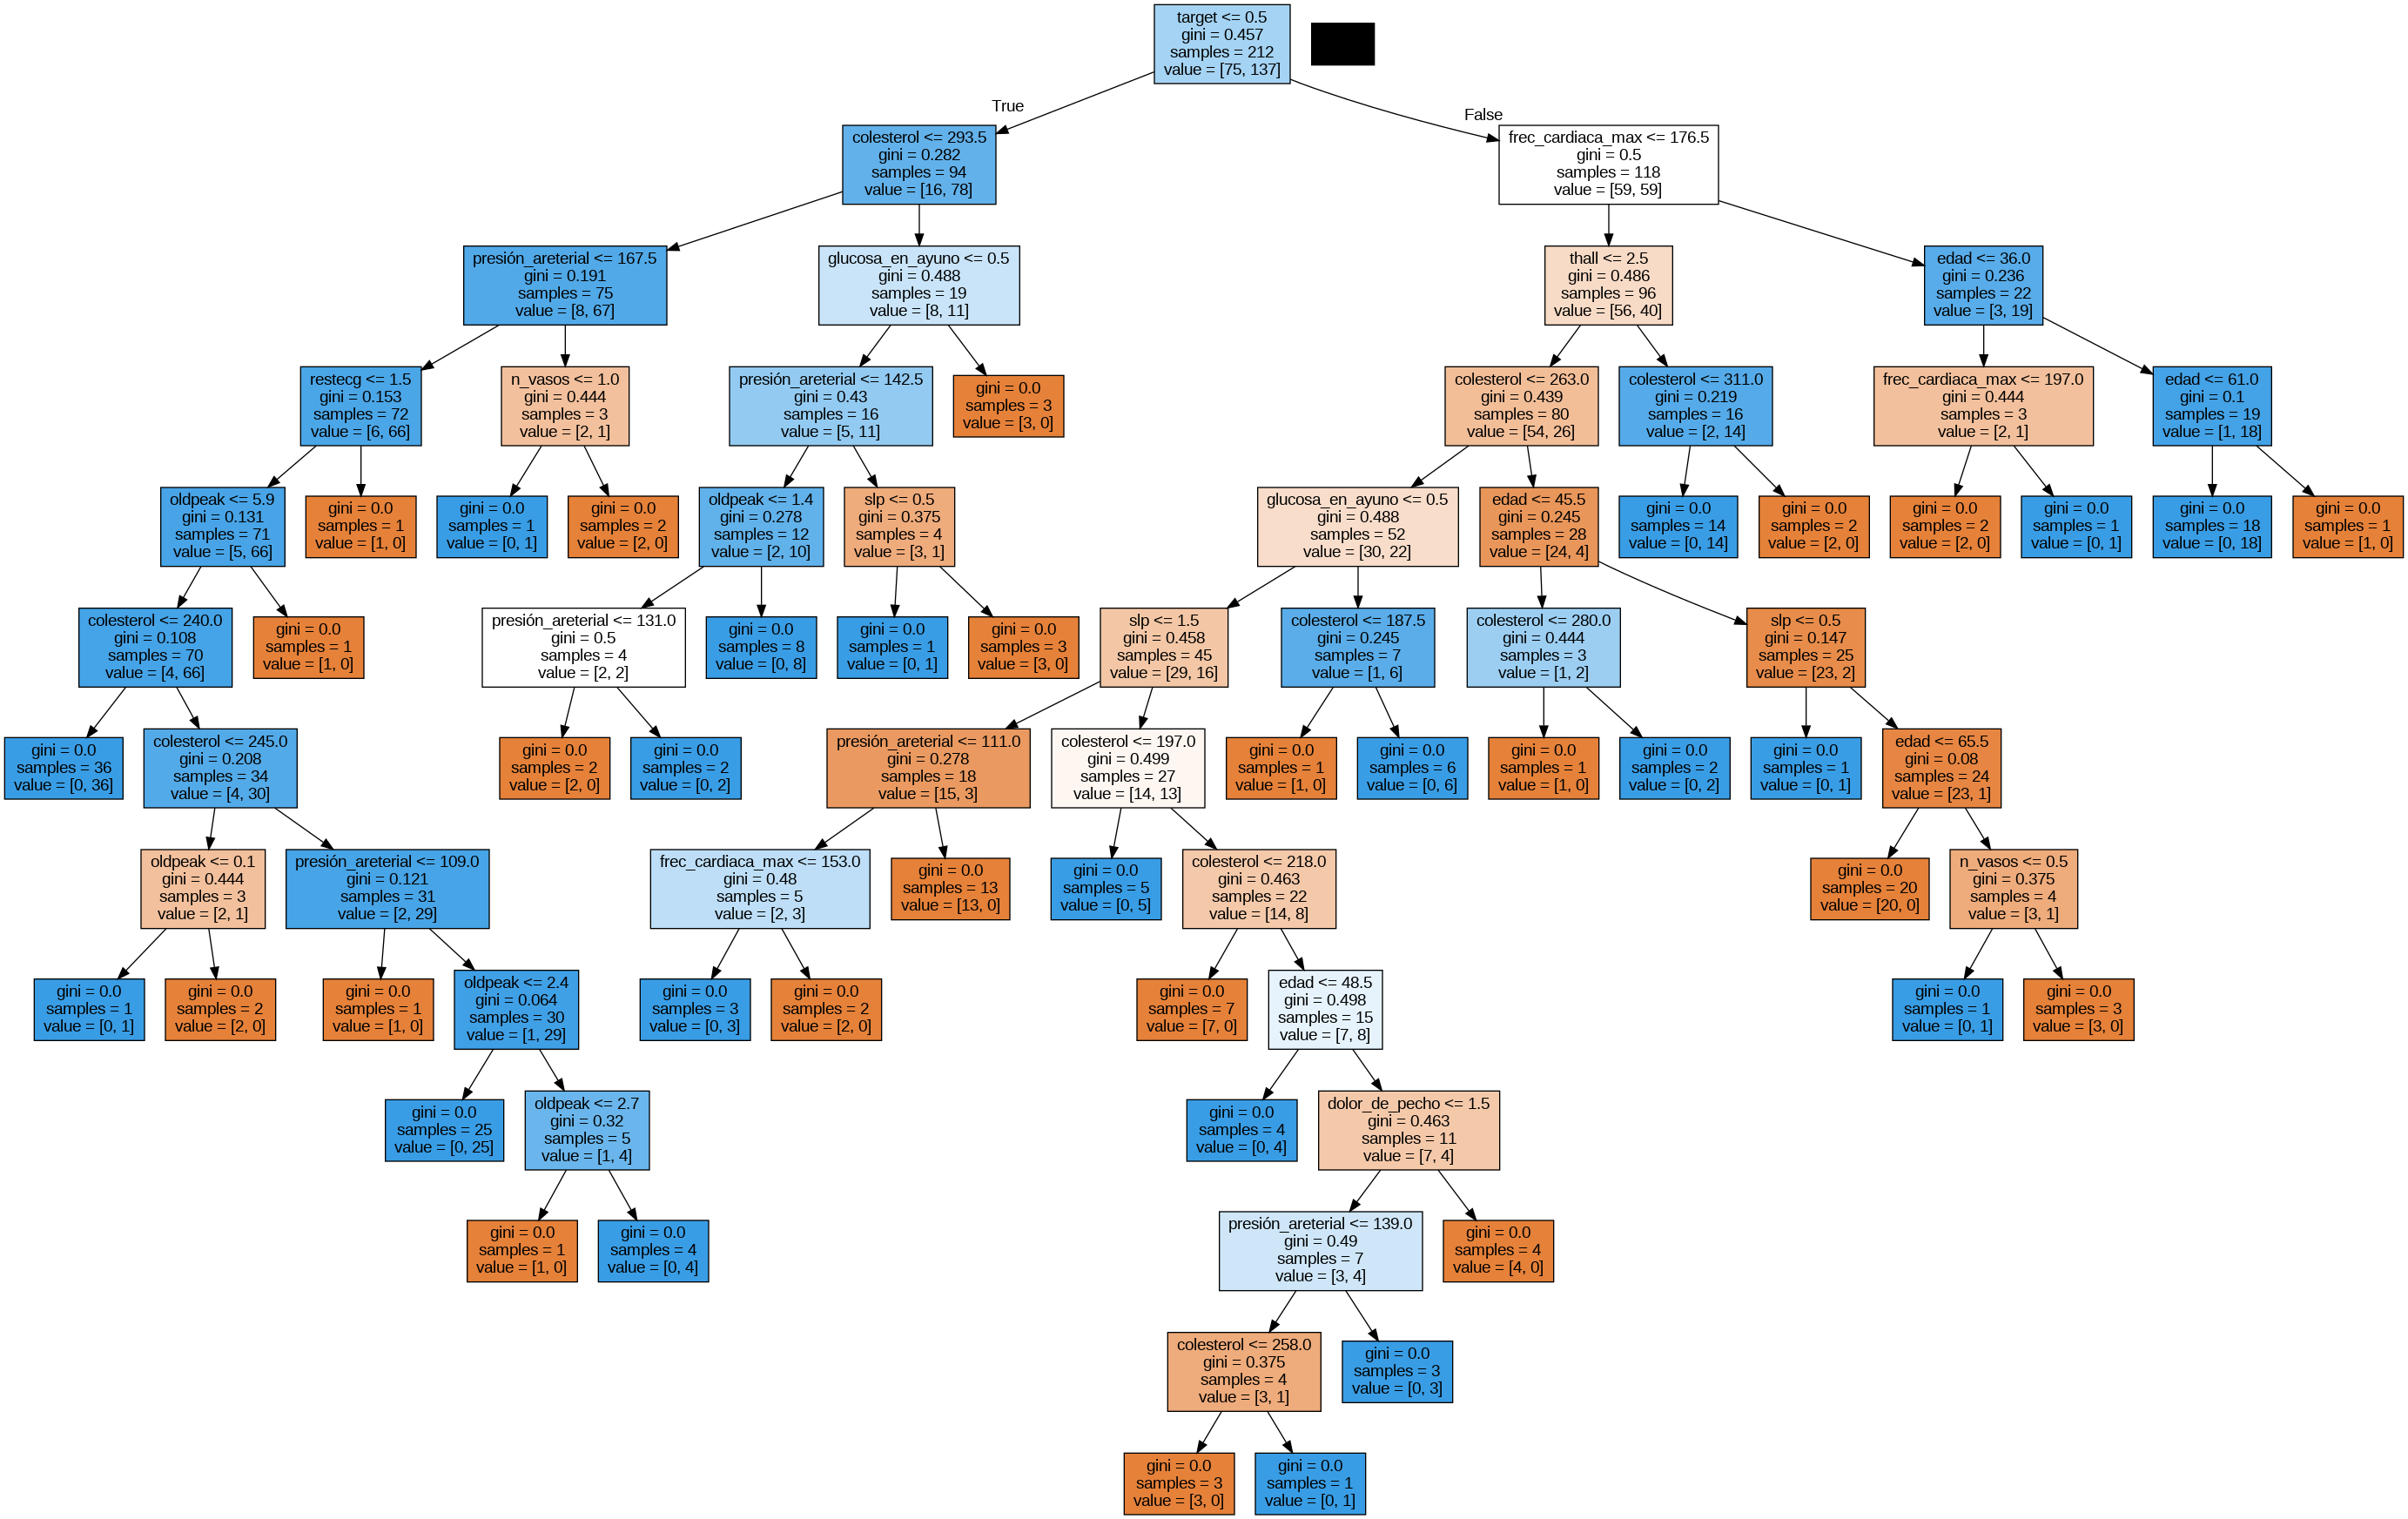

In [132]:
from IPython.display import Image
from six import StringIO
import pydot

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, feature_names=X.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Para columna 'dolor_de_pecho'

In [133]:
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(data1[['dolor_de_pecho']])
X1 = data1.drop(columns=['dolor_de_pecho']) 

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0 )

**Regresión logística**

In [134]:
reg_log.fit(X1_train, y1_train)
y1_pred = reg_log.predict(X1_test)

In [135]:
m1 = confusion_matrix(y1_test, y1_pred)
m1

array([[32,  1,  8,  0],
       [ 5,  0, 12,  0],
       [15,  2, 11,  0],
       [ 5,  0,  0,  0]])

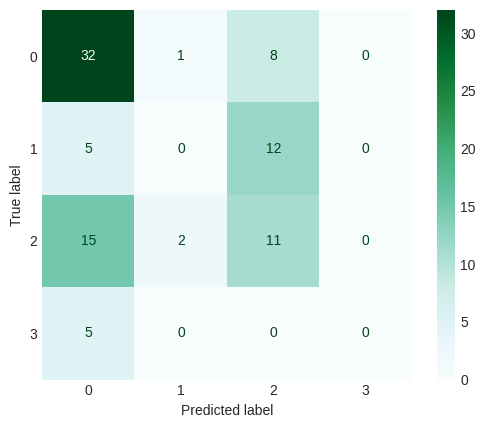

In [136]:
ConfusionMatrixDisplay(m1).plot(cmap=plt.cm.BuGn);

**Random Forest**

In [137]:
forest.fit(X1_train, y1_train)
y1_pred = forest.predict(X1_test)

Score:  0.5384615384615384


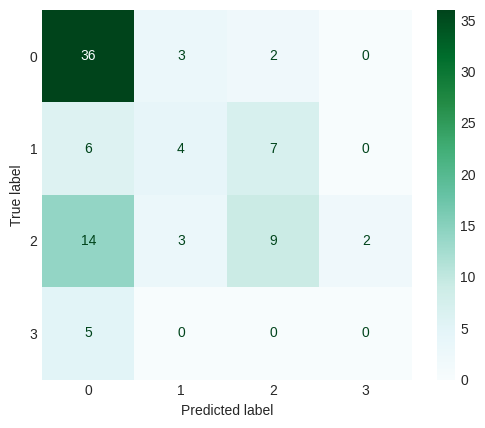

In [138]:
print('Score: ', forest.score(X1_test, y1_test))

matriz_confusion1 = confusion_matrix(y1_test, y1_pred)
ConfusionMatrixDisplay(matriz_confusion1).plot(cmap=plt.cm.BuGn);

**Decision Tree**

In [139]:
arbol.fit(X1_train, y1_train)
y1_pred = arbol.predict(X1_test)

Score:  0.46153846153846156


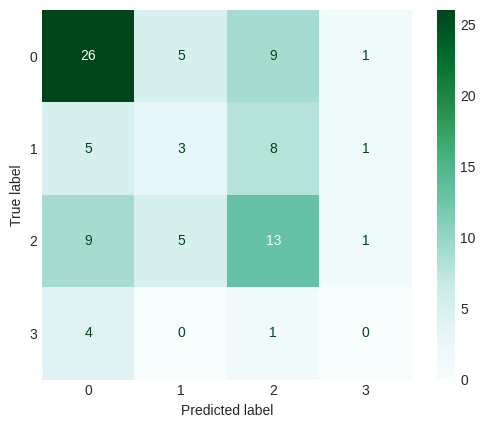

In [140]:
print('Score: ', arbol.score(X1_test, y1_test))

matriz_confusion1 = confusion_matrix(y1_test, y1_pred)
ConfusionMatrixDisplay(matriz_confusion1).plot(cmap=plt.cm.BuGn);

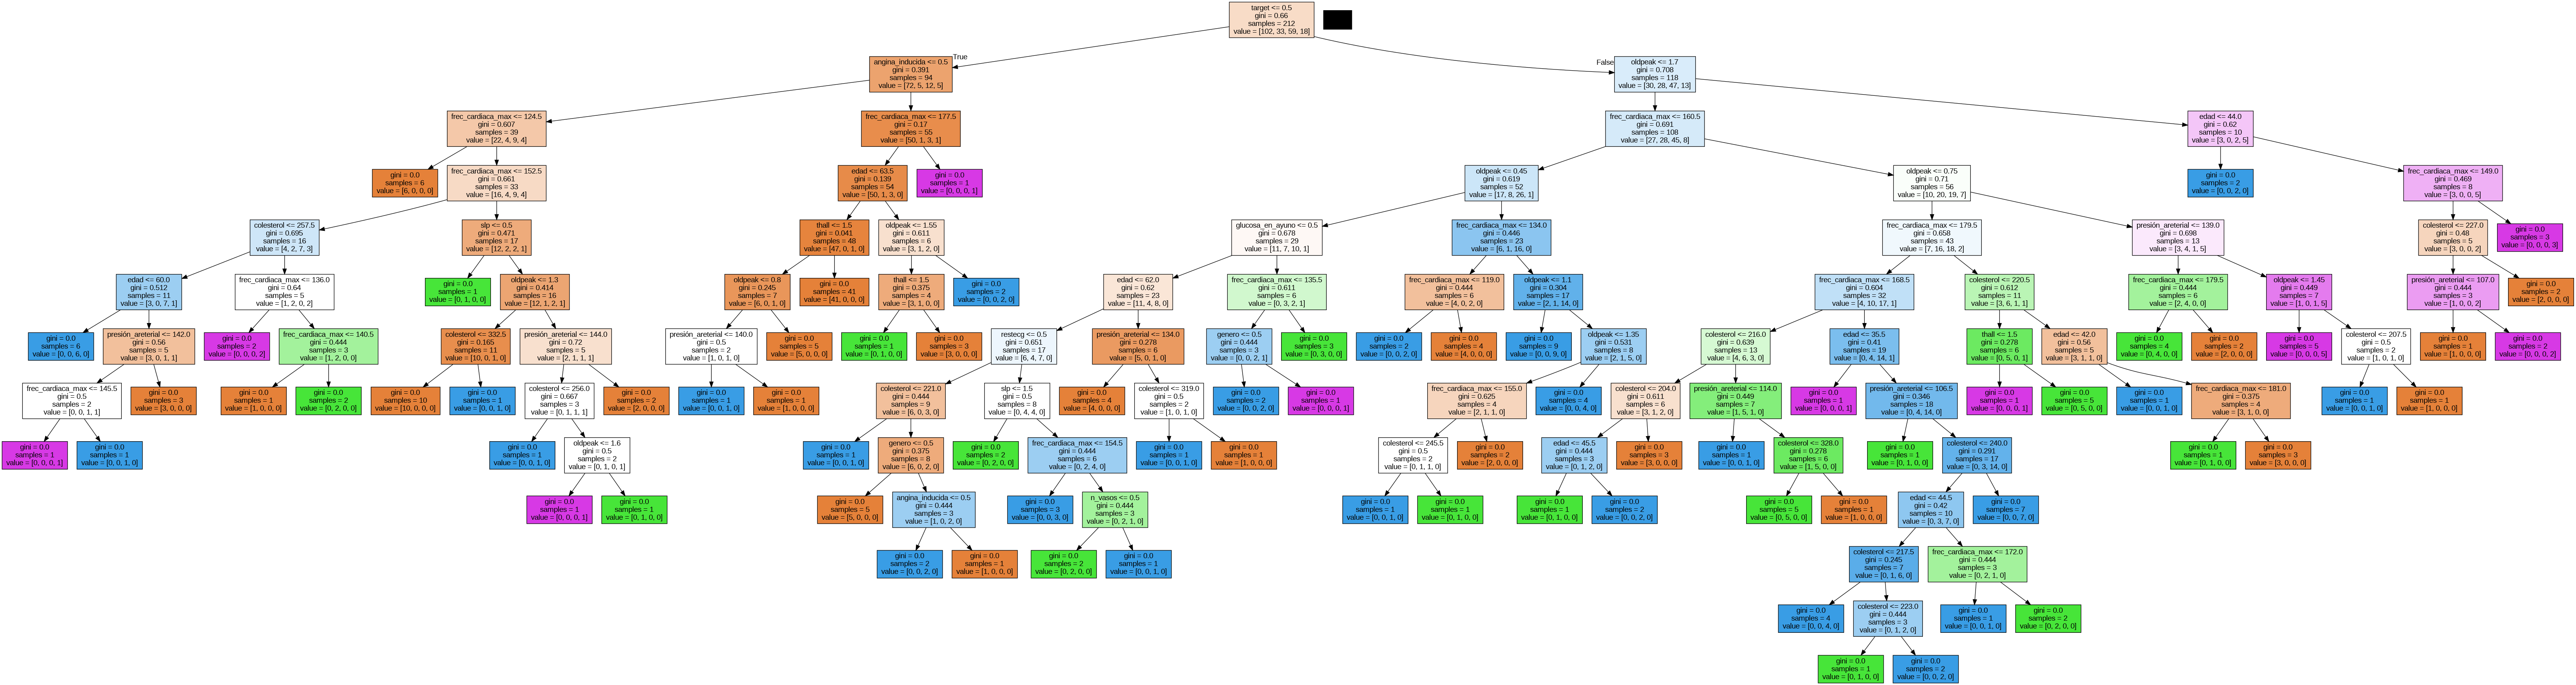

In [141]:
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, feature_names=X1.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Para columna 'n_vasos'

In [142]:
y2 = le.fit_transform(data1[['n_vasos']])
X2 = data1.drop(columns=['n_vasos']) 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0 )

**Regresión logística**

In [143]:
reg_log.fit(X2_train, y2_train)
y2_pred = reg_log.predict(X2_test)

In [144]:
m2 = confusion_matrix(y2_test, y2_pred)
m2

array([[45,  1,  1,  1,  0],
       [15,  5,  1,  3,  0],
       [ 8,  3,  0,  0,  0],
       [ 3,  2,  1,  0,  0],
       [ 2,  0,  0,  0,  0]])

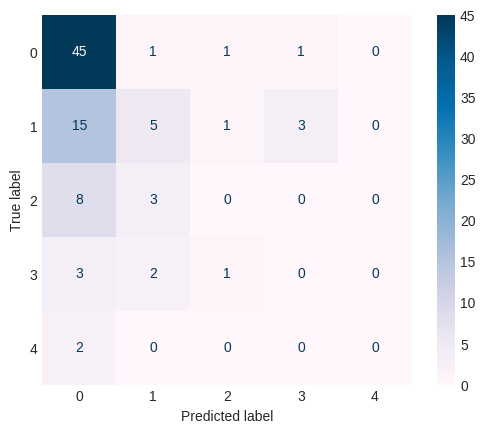

In [145]:
ConfusionMatrixDisplay(m2).plot(cmap=plt.cm.PuBu);

**Random Forest**

In [146]:
forest.fit(X2_train, y2_train)
y2_pred = forest.predict(X2_test)

Score:  0.4945054945054945


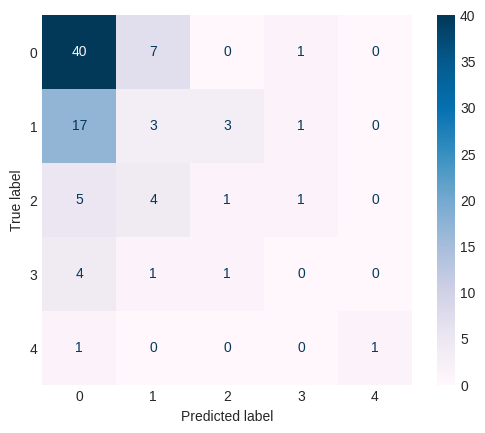

In [147]:
print('Score: ', forest.score(X2_test, y2_test))

matriz_confusion2 = confusion_matrix(y2_test, y2_pred)
ConfusionMatrixDisplay(matriz_confusion2).plot(cmap=plt.cm.PuBu);

**Decision Tree**

In [148]:
arbol.fit(X2_train, y2_train)
y2_pred = arbol.predict(X2_test)

Score:  0.4945054945054945


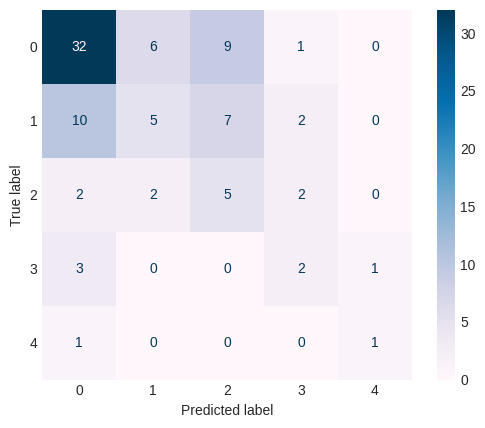

In [149]:
print('Score: ', arbol.score(X2_test, y2_test))

matriz_confusion2 = confusion_matrix(y2_test, y2_pred)
ConfusionMatrixDisplay(matriz_confusion2).plot(cmap=plt.cm.PuBu);

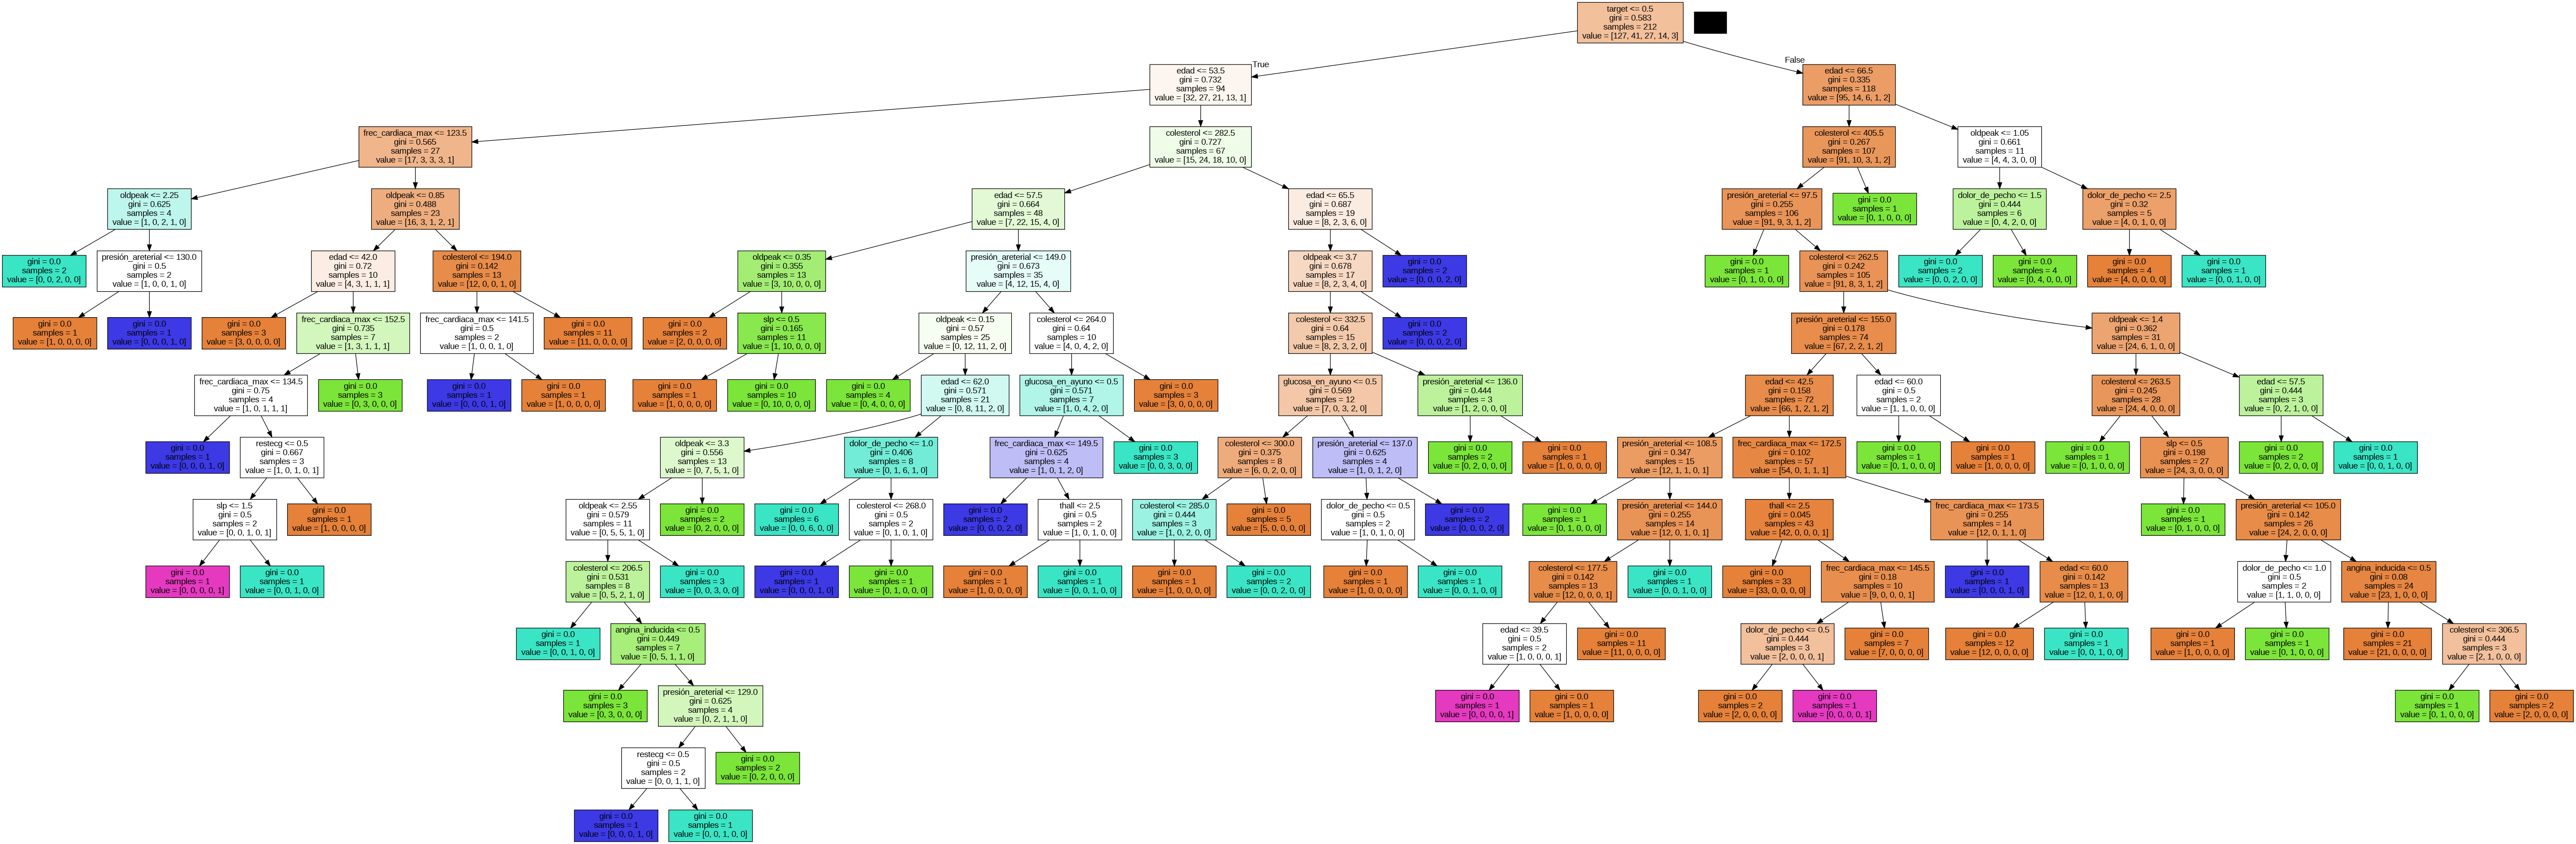

In [150]:
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, feature_names=X2.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Para columna 'glucosa_en_ayuno'

In [151]:
le = preprocessing.LabelEncoder()
y3 = le.fit_transform(data1[['glucosa_en_ayuno']])
X3 = data1.drop(columns=['glucosa_en_ayuno']) 

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0 )

**Regresión logística**

In [152]:
reg_log.fit(X3_train, y3_train)
y3_pred = reg_log.predict(X3_test)

In [153]:
m3 = confusion_matrix(y3_test, y3_pred)
m3

array([[80,  0],
       [11,  0]])

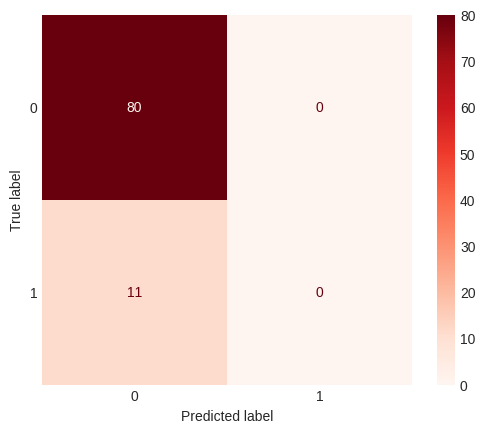

In [154]:
ConfusionMatrixDisplay(m3).plot(cmap=plt.cm.Reds);

**Random Forest**

In [155]:
forest.fit(X3_train, y3_train)
y3_pred = forest.predict(X3_test)

Score:  0.8241758241758241


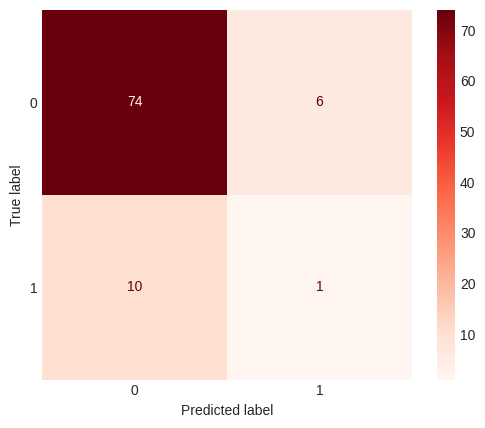

In [156]:
print('Score: ', forest.score(X3_test, y3_test))

matriz_confusion3 = confusion_matrix(y3_test, y3_pred)
ConfusionMatrixDisplay(matriz_confusion3).plot(cmap=plt.cm.Reds);

**Decision Tree**

In [157]:
arbol.fit(X3_train, y3_train)
y3_pred = arbol.predict(X3_test)

Score:  0.7692307692307693


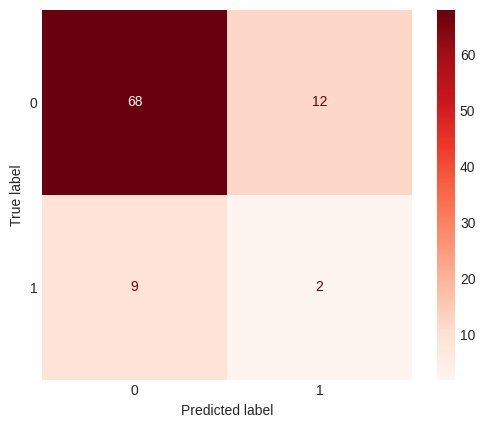

In [158]:
print('Score: ', arbol.score(X3_test, y3_test))

matriz_confusion3 = confusion_matrix(y3_test, y3_pred)
ConfusionMatrixDisplay(matriz_confusion3).plot(cmap=plt.cm.Reds);

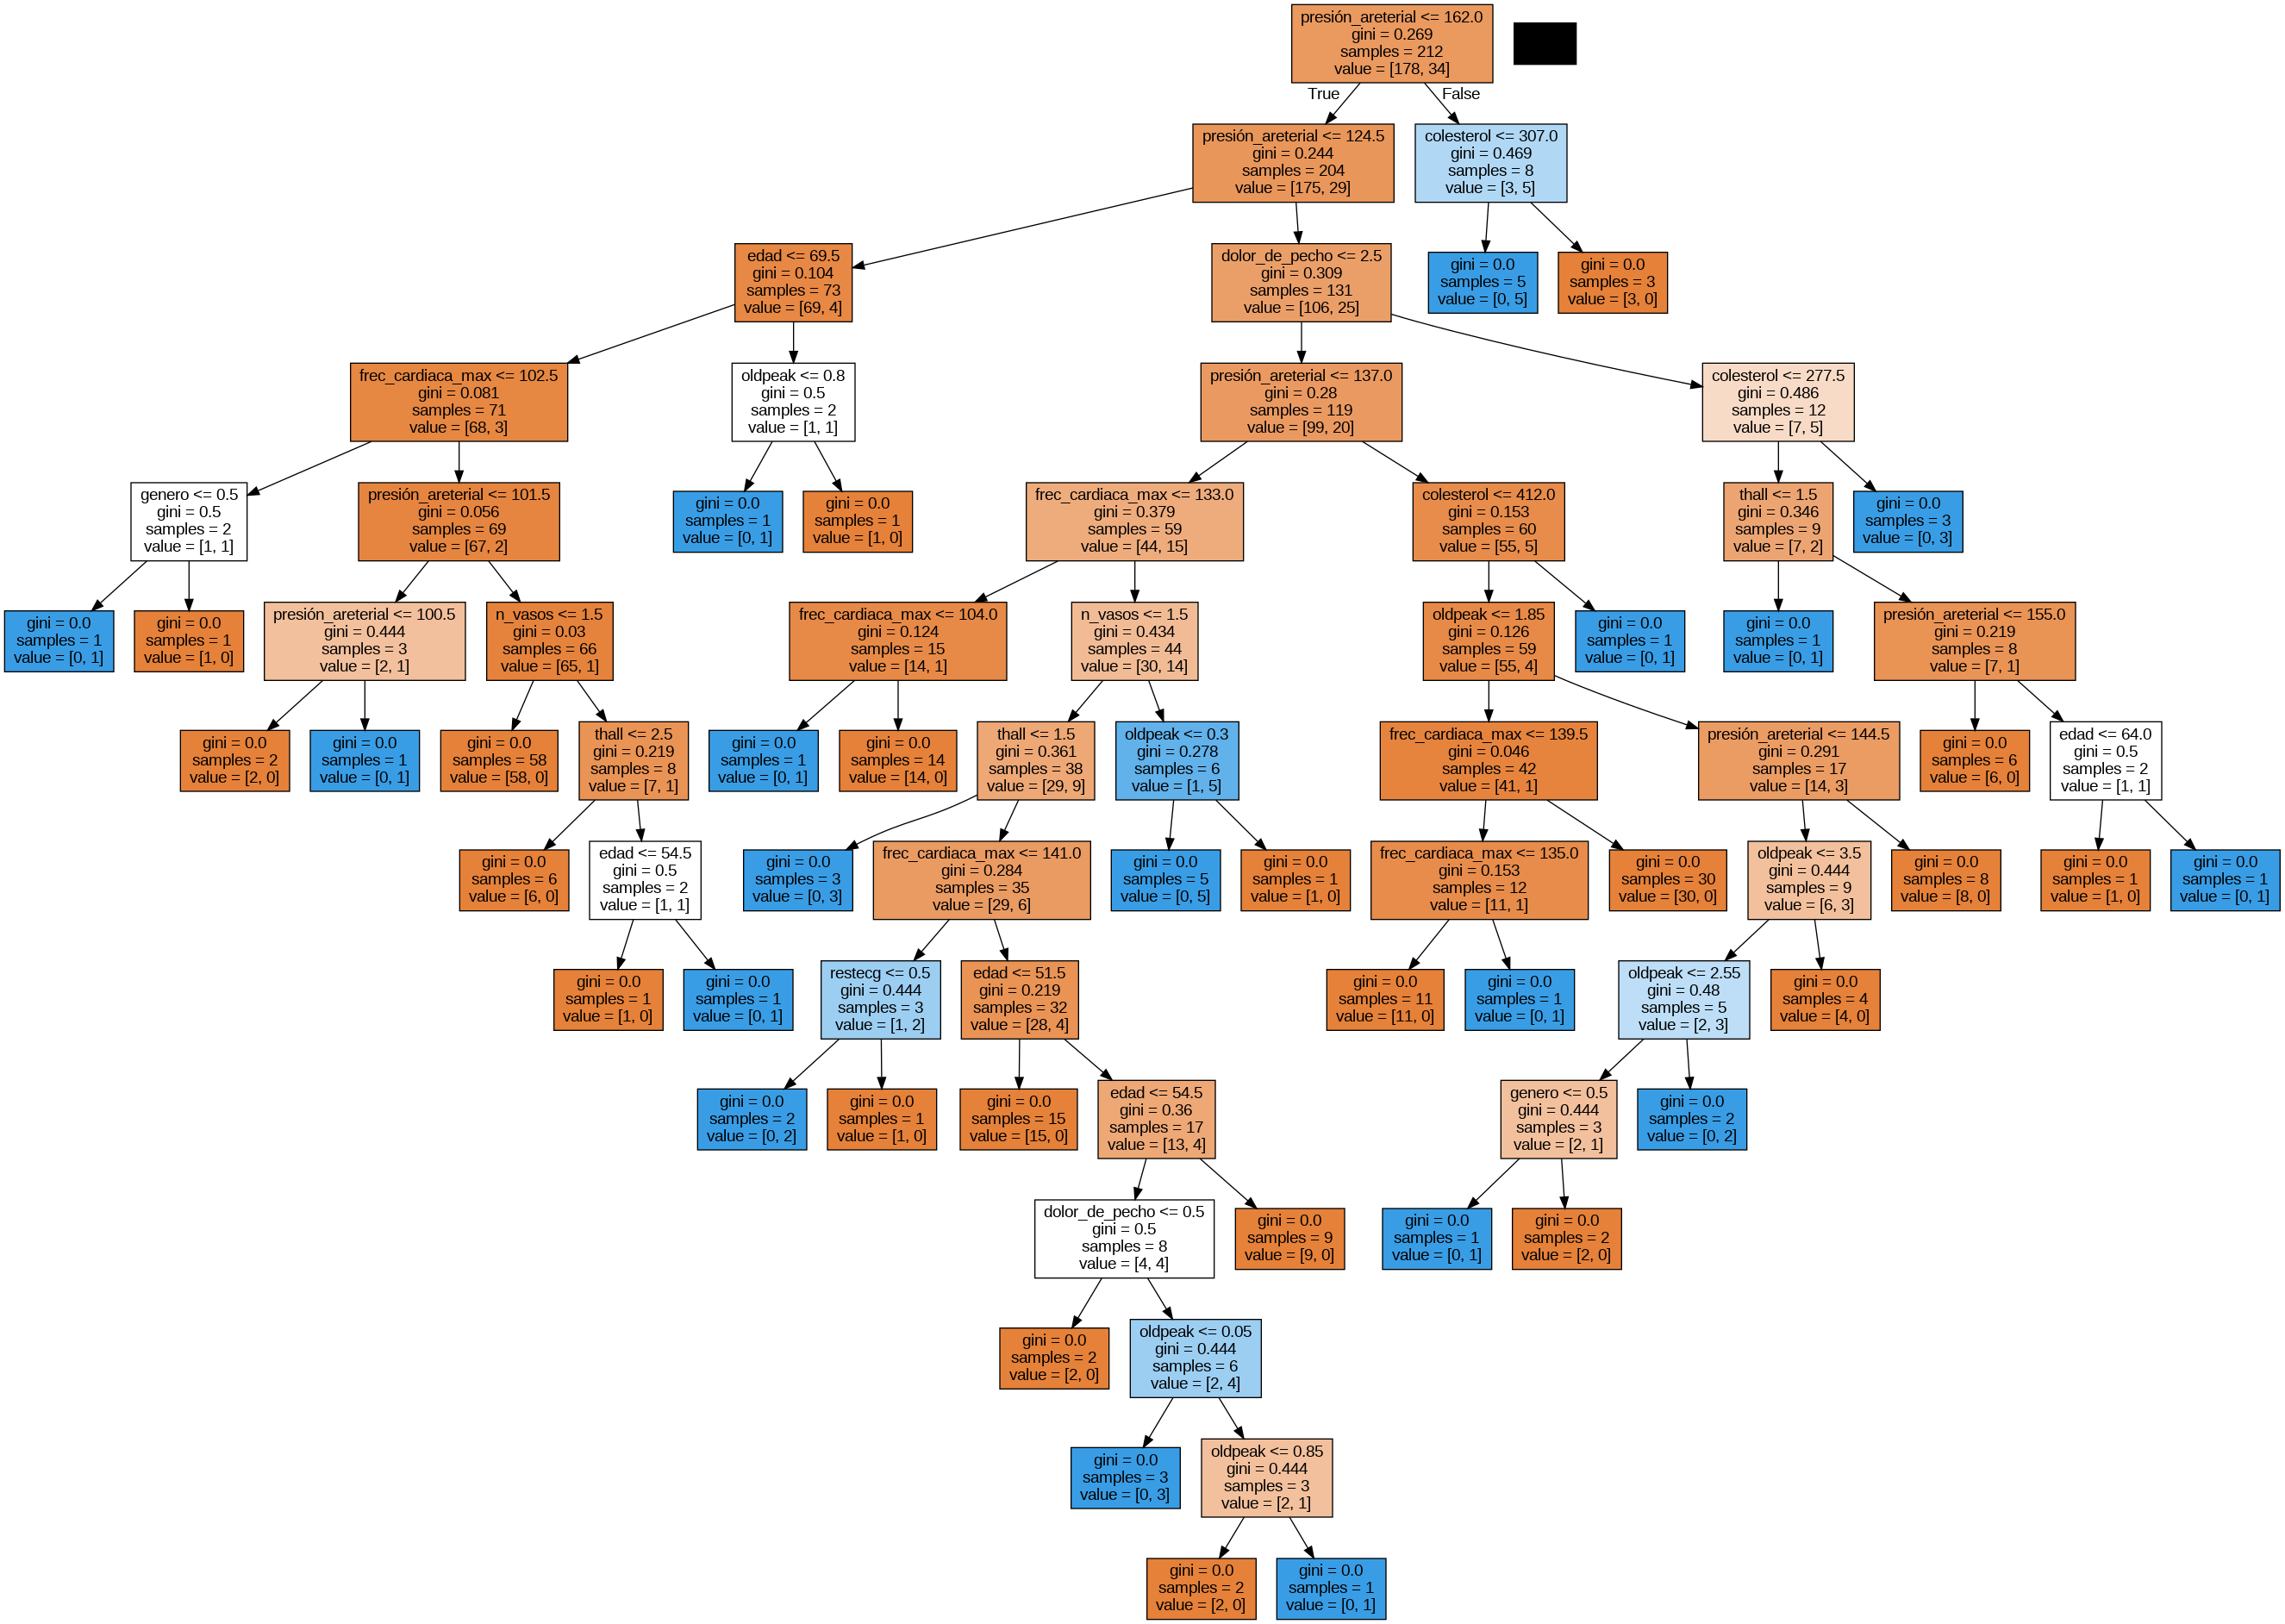

In [159]:
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, feature_names=X3.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


**Predicción de valores numéricos**

In [160]:
X = data1.drop(columns=['target']) 
y = data1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [161]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 10)

forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

In [162]:
print('Score: ', forest_reg.score(X_test, y_test))

Score:  0.41914893617021276


**Aplicación de modelos empleando todas las columnas del dataframe**

In [173]:
X = data.iloc[:,:-1].values # Seleccionamos hasta la última columna
y = data.iloc[:,-1].values

In [174]:
X_sample, y_sample = train_test_split(data, train_size=0.3, random_state=0)

In [175]:
X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
X_test = y_sample.iloc[:,:-1].values
y_test = y_sample.iloc[:,-1].values

In [176]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [177]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [178]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [179]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [180]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [181]:
Scores = pd.DataFrame({
    'Nombre del modelo': ['SVM', 'Regresion logística', 'Árbol de decision', 'Bosque aleatorio'],
    'Puntuación': [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]
})
Scores = Scores.sort_values(by = ['Puntuación'], ascending = False)
Scores

Nombre del modelo  Puntuación
3     Bosque aleatorio    0.826291
1  Regresion logística    0.821596
0                  SVM    0.816901
2    Árbol de decision    0.760563

Podemos observar que la puntación más alta de acertividad la obtuvo el método Random Forest con 82.62%